# 📰 Fake News Detection with Naive Bayes

In an era where misinformation spreads faster than ever, it's vital to distinguish between real and fake news. In this project, we’ll use the ISOT Fake News Dataset to build a text classification model that can help us identify fake news articles.

We'll go through:
- Cleaning and understanding our data (EDA)
- Preprocessing the text
- Training a Naive Bayes classifier
- Evaluating the performance
- Visualizing the results

Let’s uncover the truth—one headline at a time!


## 🧩 Import Libraries
Before we dive in, let’s bring in all the essential libraries we’ll need — from data handling to model building and visualizing.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text preprocessing
import re
import string

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


## 📂 Loading the Dataset

We’ll start by loading the dataset which contains two files: one for fake news and one for real news. Then we’ll combine them into a single DataFrame for simplicity.


In [2]:
# Load both datasets
fake_df = pd.read_csv('/content/drive/MyDrive/archive (3)/Fake.csv')
real_df = pd.read_csv('/content/drive/MyDrive/archive (3)/True.csv')

# Add a label column: 0 = Fake, 1 = Real
fake_df['label'] = 0
real_df['label'] = 1

# Combine the datasets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


## 📈 Exploratory Data Analysis

Before diving into modeling, let’s explore the dataset:
- Check for class imbalance
- Visualize word clouds for fake vs real
- Identify potential noise in the data


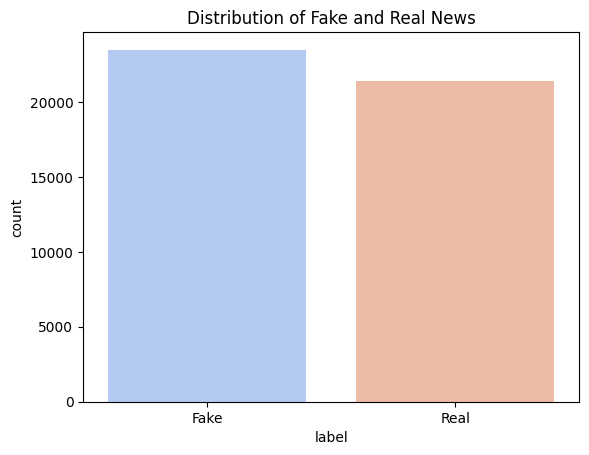

In [3]:
# Check class distribution
sns.countplot(data=df, x='label', palette='coolwarm')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title('Distribution of Fake and Real News')
plt.show()


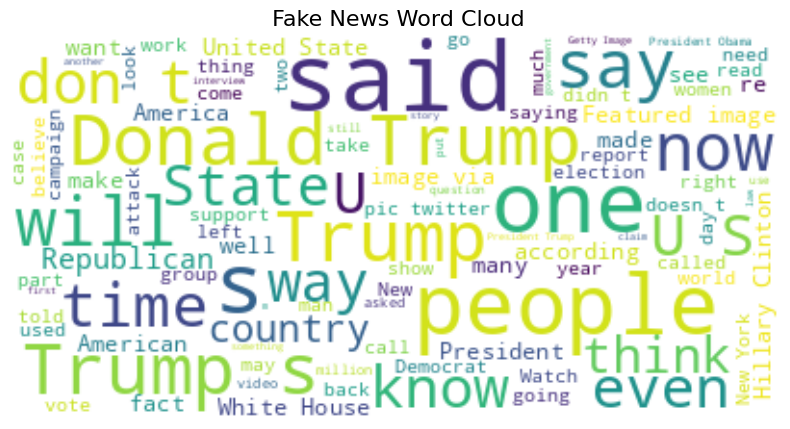

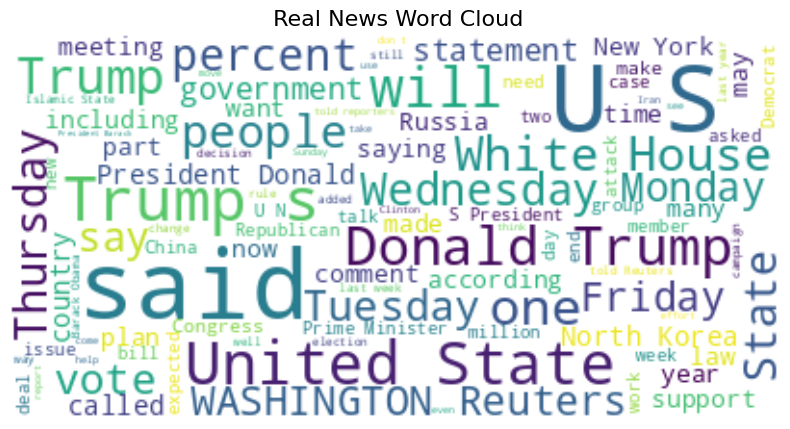

In [11]:
# Word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Word clouds for fake and real news
plot_wordcloud(fake_df['text'], ' Fake News Word Cloud')
plot_wordcloud(real_df['text'], ' Real News Word Cloud')


## 🧹 Text Preprocessing

Now we’ll clean up the text:
- Remove punctuation
- Convert to lowercase
- Remove numbers and unwanted characters


In [5]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

df['clean_text'] = df['text'].apply(clean_text)


## 📚 TF-IDF Vectorization

We’ll now convert the cleaned text into numerical features using the TF-IDF method. This helps the model understand the importance of words across documents.


In [6]:
# Split data
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## 🚀 Training the Naive Bayes Classifier

We’ll now use Multinomial Naive Bayes—a classic and effective algorithm for text classification.


In [7]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

## 📊 Evaluating the Model

Let’s check how well our model performs using:
- Accuracy
- Classification report
- Confusion matrix


In [8]:
# Predictions
y_pred = nb_model.predict(X_test_tfidf)

# Accuracy
print("✅ Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

✅ Accuracy Score: 0.9347

📄 Classification Report:

              precision    recall  f1-score   support

        Fake       0.94      0.93      0.94      4710
        Real       0.93      0.94      0.93      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



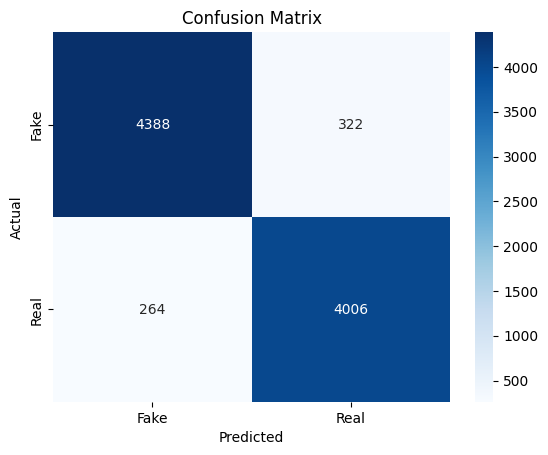

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 💾 Saving the Model

We’ll save our trained model and vectorizer for later use or deployment.


In [10]:
import joblib

# Save the model and vectorizer
joblib.dump(nb_model, 'naive_bayes_fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']